## Definindo o Problema

In [123]:
#!pip install lightgbm;
#!pip install pymoo;
#!pip install -U pyrecorder;

In [124]:
import numpy as np
def special_floor(x):
    x = int(np.round(x))
    if x == 0:
        x = 1
    return x

In [125]:
ITERATIONS = 32
POPULATION = 32

In [2]:
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from yellowbrick.classifier import ConfusionMatrix
import numpy as np
from tqdm.notebook import tqdm as tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
#from google.colab import drive
import pickle
from pymoo.algorithms.soo.nonconvex.pso import PSO, PSOAnimation
#from pymoo.factory import Rastrigin
from pymoo.optimize import minimize
import matplotlib.pyplot as plt
from pymoo.factory import get_termination
#from pymoo.util.display import Display
from pymoo.core.callback import Callback

In [127]:
#!pip install XGBoost

In [3]:
import xgboost as xgb

In [129]:
#drive.mount('/content/gdrive')

In [4]:
#with open('/content/gdrive/MyDrive/datasets/credit.pkl', 'rb') as f:
#    x_heart_train, x_heart_test, y_heart_train, y_heart_test = pickle.load(f)
    
#with open('./heart.pkl', 'rb') as f:
#    x_heart, y_heart = pickle.load(f)
    
with open('./heart.pkl', 'rb') as f:
    x_heart, y_heart = pickle.load(f)

Definindo as restrições 

In [131]:
DIMENSIONS = 16

In [132]:

n_estimators_max = 1000
learning_rate_max = 0.6
subsample_max = 1.0
colsample_bytree_max = 1.0
gamma_max = 0.5
max_depth_max = 10
min_child_weight_max = 10
reg_alpha_max = 0.1
reg_lambda_max = 1
scale_pos_weight_max = 10
base_score_max = 1





n_estimators_min = 10
learning_rate_min = 0.0001
subsample_min = 0.6
colsample_bytree_min = 0.6
gamma_min = 0
max_depth_min = 3
min_child_weight_min = 1
reg_alpha_min = 0
reg_lambda_min = 0
scale_pos_weight_min = 1
base_score_min = 0


Definindo o problema

In [133]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

class OptimizeWithAccuracy(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var= 11,
                         n_obj=1,
                         n_constr=11,
                         xl=np.array([
                          n_estimators_min,
                            learning_rate_min,
                            subsample_min,
                            colsample_bytree_min,
                            gamma_min,
                            max_depth_min,
                            min_child_weight_min,
                            reg_alpha_min,
                            reg_lambda_min,
                            scale_pos_weight_min,
                            base_score_min
                          ]),
                         xu=np.array([
                            n_estimators_max,
                            learning_rate_max,
                            subsample_max,
                            colsample_bytree_max,
                            gamma_max,
                            max_depth_max,
                            min_child_weight_max,
                            reg_alpha_max,
                            reg_lambda_max,
                            scale_pos_weight_max,
                            base_score_max,
                            ])
                        )

    def _evaluate(self, x, out, *args, **kwargs):
        #num_leaves, min_child_samples, n_estimators, learning_rate, subsample_for_bin, min_split_gain, min_child_weight, reg_alpha, reg_lambda
       
        model_xgboost = xgb.XGBClassifier(
                          n_estimators = int(np.round(x[0])),
                          learning_rate = x[1],
                          subsample = x[2],
                          colsample_bytree = x[3],
                          gamma = x[4],
                          max_depth = special_floor(x[5]),
                          min_child_weight = int(np.round(x[6])),
                          reg_alpha = x[7],
                          reg_lambda = x[8],
                          scale_pos_weight = int(x[9]),
                          base_score       = x[10],
                          n_jobs = -1
                                       )
        
        kfold = KFold(n_splits = 3, shuffle = True)
        
        scores = cross_val_score(model_xgboost, x_heart, y_heart, cv = kfold, n_jobs = -1)  
        result = scores.mean()
        #if not result:
        #  result = 0
        
        out['F'] = -1 * result

problemAccuracy = OptimizeWithAccuracy()

In [134]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

class OptimizeWithF1(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var= 11,
                         n_obj=1,
                         n_constr=11,
                         xl=np.array([
                          n_estimators_min,
                            learning_rate_min,
                            subsample_min,
                            colsample_bytree_min,
                            gamma_min,
                            max_depth_min,
                            min_child_weight_min,
                            reg_alpha_min,
                            reg_lambda_min,
                            scale_pos_weight_min,
                            base_score_min
                          ]),
                         xu=np.array([
                            n_estimators_max,
                            learning_rate_max,
                            subsample_max,
                            colsample_bytree_max,
                            gamma_max,
                            max_depth_max,
                            min_child_weight_max,
                            reg_alpha_max,
                            reg_lambda_max,
                            scale_pos_weight_max,
                            base_score_max,
                            ])
                        )

    def _evaluate(self, x, out, *args, **kwargs):
        #num_leaves, min_child_samples, n_estimators, learning_rate, subsample_for_bin, min_split_gain, min_child_weight, reg_alpha, reg_lambda
       
        model_xgboost = xgb.XGBClassifier(
                          n_estimators = int(np.round(x[0])),
                          learning_rate = x[1],
                          subsample = x[2],
                          colsample_bytree = x[3],
                          gamma = x[4],
                          max_depth = special_floor(x[5]),
                          min_child_weight = int(np.round(x[6])),
                          reg_alpha = x[7],
                          reg_lambda = x[8],
                          scale_pos_weight = int(x[9]),
                          base_score       = x[10],
                          n_jobs = -1
                                       )
        
        kfold = KFold(n_splits = 3, shuffle = True)

        scores = cross_val_score(model_xgboost, x_heart, y_heart, cv = kfold, scoring='f1', n_jobs = -1)  
        result = scores.mean()
        out['F'] = -1 * result

problemF1 = OptimizeWithF1()

In [5]:
xgb_mean = []
for i in range(30):
    model_xgboost = xgb.XGBClassifier(
                        n_jobs = -1
                                    )
    

    kfold = KFold(n_splits = 3, shuffle = True)

    scores = cross_val_score(model_xgboost, x_heart, y_heart, cv = kfold, scoring='f1', n_jobs = -1)  

    result = scores.mean()
    
    xgb_mean.append(result)
    
xgb_mean# Convert the Python array to a numpy array
numpy_array = np.array(xgb_mean)

# Calculate the average value using numpy.mean()
average_value = np.mean(numpy_array)

print("'", average_value, "'")

' 0.8702435033805583 '


In [135]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

class OptimizeWithAUC(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var= 11,
                         n_obj=1,
                         n_constr=11,
                         xl=np.array([
                          n_estimators_min,
                            learning_rate_min,
                            subsample_min,
                            colsample_bytree_min,
                            gamma_min,
                            max_depth_min,
                            min_child_weight_min,
                            reg_alpha_min,
                            reg_lambda_min,
                            scale_pos_weight_min,
                            base_score_min
                          ]),
                         xu=np.array([
                            n_estimators_max,
                            learning_rate_max,
                            subsample_max,
                            colsample_bytree_max,
                            gamma_max,
                            max_depth_max,
                            min_child_weight_max,
                            reg_alpha_max,
                            reg_lambda_max,
                            scale_pos_weight_max,
                            base_score_max,
                            ])
                        )

    def _evaluate(self, x, out, *args, **kwargs):
        #num_leaves, min_child_samples, n_estimators, learning_rate, subsample_for_bin, min_split_gain, min_child_weight, reg_alpha, reg_lambda
       
        model_xgboost = xgb.XGBClassifier(
                          n_estimators = int(np.round(x[0])),
                          learning_rate = x[1],
                          subsample = x[2],
                          colsample_bytree = x[3],
                          gamma = x[4],
                          max_depth = special_floor(x[5]),
                          min_child_weight = int(np.round(x[6])),
                          reg_alpha = x[7],
                          reg_lambda = x[8],
                          scale_pos_weight = int(x[9]),
                          base_score       = x[10],
                          n_jobs = -1
                                       )

        
        kfold = KFold(n_splits = 3, shuffle = True)
  
        scores = cross_val_score(model_xgboost, x_heart, y_heart, cv = kfold, scoring='roc_auc', n_jobs = -1)  
        
        result = scores.mean()

        out['F'] = -1 * result

problemAUC = OptimizeWithAUC()

In [136]:
from pymoo.util.display.column import Column
from pymoo.util.display.output import Output

In [137]:
class MyOutput(Output):

    def __init__(self):
        super().__init__()
        global pbar 
        pbar = tqdm(total=ITERATIONS)
        self.score = Column("score", width=13)
        self.Parameters = Column("Parameters", width=35)
        self.columns += [self.score, self.Parameters]

    def update(self, algorithm):
        super().update(algorithm)
        self.score.set(-np.min(algorithm.pop.get("F")))
        #self.Parameters.set(algorithm.pop.get("X")[0])
        pbar.update(1)
        if pbar.n == ITERATIONS: pbar.close()

## Particle Swarm Optimization (PSO)

### Acurácia

In [138]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
import numpy as np

In [139]:
xl=np.array([n_estimators_min,
             learning_rate_min,
             subsample_min,
             colsample_bytree_min,
             gamma_min,
             max_depth_min,
             min_child_weight_min,
             reg_alpha_min,
             reg_lambda_min,
             scale_pos_weight_min,
             base_score_min])
xu=np.array([n_estimators_max,
             learning_rate_max,
             subsample_max,
             colsample_bytree_max,
             gamma_max,
             max_depth_max,
             min_child_weight_max,
             reg_alpha_max,
             reg_lambda_max,
             scale_pos_weight_max,
             base_score_max])

In [140]:
def PSO_Optimize_Accuracy(values):
    x = values[0] 
    model_xgboost = xgb.XGBClassifier(
                          n_estimators = int(np.round(x[0])),
                          learning_rate = x[1],
                          subsample = x[2],
                          colsample_bytree = x[3],
                          gamma = x[4],
                          max_depth = special_floor(x[5]),
                          min_child_weight = int(np.round(x[6])),
                          reg_alpha = x[7],
                          reg_lambda = x[8],
                          scale_pos_weight = int(x[9]),
                          base_score       = x[10],
                          n_jobs = -1
                                    )
    
    kfold = KFold(n_splits = 10, shuffle = True)
    
    scores = cross_val_score(model_xgboost, x_heart, y_heart, cv = kfold, n_jobs = -1)  
    result = scores.mean()     

    return -result

In [141]:
def PSO_Optimize_F1(values):
    x = values[0] 
    model_xgboost = xgb.XGBClassifier(
                          n_estimators = int(np.round(x[0])),
                          learning_rate = x[1],
                          subsample = x[2],
                          colsample_bytree = x[3],
                          gamma = x[4],
                          max_depth = special_floor(x[5]),
                          min_child_weight = int(np.round(x[6])),
                          reg_alpha = x[7],
                          reg_lambda = x[8],
                          scale_pos_weight = int(x[9]),
                          base_score       = x[10],
                          n_jobs = -1
                                    )
    
    kfold = KFold(n_splits = 10, shuffle = True)
    
    scores = cross_val_score(model_xgboost,  x_heart, y_heart, cv = kfold, n_jobs = -1, scoring='f1')  
    result = scores.mean()     

    return -result

In [142]:
def PSO_Optimize_AUC(values):
    x = values[0] 
    model_xgboost = xgb.XGBClassifier(
                          n_estimators = int(np.round(x[0])),
                          learning_rate = x[1],
                          subsample = x[2],
                          colsample_bytree = x[3],
                          gamma = x[4],
                          max_depth = special_floor(x[5]),
                          min_child_weight = int(np.round(x[6])),
                          reg_alpha = x[7],
                          reg_lambda = x[8],
                          scale_pos_weight = int(x[9]),
                          base_score       = x[10],
                          n_jobs = -1
                                    )
    
    kfold = KFold(n_splits = 10, shuffle = True)
    
    scores = cross_val_score(model_xgboost, x_heart, y_heart, cv = kfold, n_jobs = -1, scoring='roc_auc')  
    result = scores.mean()     

    return -result

In [143]:
def run_accuracy_pso():
    # Call an instance of PSO
    swarm_size = 32
    iters = 32
    dim = 11
    options = {'c1': 1.5, 'c2':1.5, 'w':0.5}
    constraints = (xl,xu)

    optimizer = ps.single.GlobalBestPSO(n_particles=swarm_size,
                                        dimensions=dim,
                                        options=options,
                                        bounds=constraints)
    cost, joint_vars = optimizer.optimize(objective_func = PSO_Optimize_Accuracy, iters=iters)
    return -cost

In [144]:
def run_auc_pso():
    # Call an instance of PSO
    swarm_size = 32
    iters = 32
    dim = 11
    options = {'c1': 1.5, 'c2':1.5, 'w':0.5}
    constraints = (xl,xu)

    optimizer = ps.single.GlobalBestPSO(n_particles=swarm_size,
                                        dimensions=dim,
                                        options=options,
                                        bounds=constraints)
    cost, joint_vars = optimizer.optimize(objective_func = PSO_Optimize_AUC, iters=iters)
    return -cost

In [145]:
def run_f1_pso():
    # Call an instance of PSO
    swarm_size = 32
    iters = 32
    dim = 11
    options = {'c1': 1.5, 'c2':1.5, 'w':0.5}
    constraints = (xl,xu)

    optimizer = ps.single.GlobalBestPSO(n_particles=swarm_size,
                                        dimensions=dim,
                                        options=options,
                                        bounds=constraints)
    cost, joint_vars = optimizer.optimize(objective_func = PSO_Optimize_F1, iters=iters)
    return -cost

## Algoritmo Genético (GA)

### Acurácia

In [146]:
ITERATIONS = 32
POPULATION = 32

In [147]:
from pymoo.algorithms.soo.nonconvex.ga import GA

In [148]:
def run_accuracy_ga(ITERATIONS = 32, POPULATION = 32):

    algorithm = GA(pop_size=POPULATION)

    term = get_termination("n_gen", ITERATIONS)

    res = minimize(problemAccuracy,
                algorithm,
                save_history=True,
                verbose=True,
                output=MyOutput(),
                termination = term)


    index_best_individual = np.where(res.pop.get('F') == np.min(res.pop.get('F')))[0][0]
    score_best_individual = res.pop.get('F')[index_best_individual]
    parameters_best_individual = res.pop.get('X')[index_best_individual]

    #print(f'Best Accuracy Score {-score_best_individual}')
    #print(f'Model parameters: \n {parameters_best_individual}')
    
    return score_best_individual, parameters_best_individual, res

In [149]:
#tracking = [-np.min(individual.pop.get('F')) for individual in res.history ]
#tracking_GA_Accuracy = tracking
#plt.plot(tracking)

In [150]:
#trlist = np.array([])
#for i in range(len(res.history)):
#  trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 

In [151]:
#scorelist = []
#
#for i in range(len(trlist)):
#  if i == 0:
#    scorelist.append(trlist[i])
#  elif trlist[i] > scorelist[i-1]:
#    scorelist.append(trlist[i])
#  else:
#    scorelist.append(scorelist[i-1])

In [152]:
#Accuracy_GA = scorelist

In [153]:
#plt.plot(scorelist);

### F1 Score 

In [214]:
from pymoo.algorithms.soo.nonconvex.ga import GA
def run_f1_ga(ITERATIONS = 32, POPULATION = 32):
    algorithm = GA(pop_size=POPULATION)

    term = get_termination("n_gen", ITERATIONS)

    res = minimize(problemF1,
                algorithm,
                save_history=True,
                verbose=False,
                output=MyOutput(),
                termination = term)


    index_best_individual = np.where(res.pop.get('F') == np.min(res.pop.get('F')))[0][0]
    score_best_individual = res.pop.get('F')[index_best_individual]
    parameters_best_individual = res.pop.get('X')[index_best_individual]

    #print(f'Best F1 Score {-score_best_individual}')
    #print(f'Model parameters: \n {parameters_best_individual}')
    
    return score_best_individual, parameters_best_individual, res

In [265]:
GA.mutation

AttributeError: type object 'GA' has no attribute 'mutation'

In [155]:
#trlist = np.array([])
#for i in range(len(res.history)):
#  trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 
#  
#scorelist = []
#
#for i in range(len(trlist)):
##for i in range(1):
#  if i == 0:
#    scorelist.append(trlist[i])
#  elif trlist[i] > scorelist[i-1]:
#    scorelist.append(trlist[i])
#  else:
#    scorelist.append(scorelist[i-1])
#    
#F1_GA = scorelist
#
#plt.plot(scorelist);

In [156]:
#tracking = [-np.min(individual.pop.get('F')) for individual in res.history ]
#tracking_GA_F1 = tracking
#plt.plot(tracking)

### AUC

In [157]:
from pymoo.algorithms.soo.nonconvex.ga import GA
def run_auc_ga(ITERATIONS = 32, POPULATION = 32):
    algorithm = GA(pop_size=POPULATION)

    term = get_termination("n_gen", ITERATIONS)

    res = minimize(problemAUC,
                algorithm,
                save_history=False,
                verbose=False,
                output=MyOutput(),
                termination = term)

    
    index_best_individual = np.where(res.pop.get('F') == np.min(res.pop.get('F')))[0][0]
    score_best_individual = res.pop.get('F')[index_best_individual]
    parameters_best_individual = res.pop.get('X')[index_best_individual]

    #print(f'Best AUC Score {-score_best_individual}')
    #print(f'Model parameters: \n {parameters_best_individual}')
    
    return score_best_individual, parameters_best_individual, res

In [158]:
#trlist = np.array([])
#for i in range(len(res.history)):
#  trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 
#  
#scorelist = []
#
#for i in range(len(trlist)):
##for i in range(1):
#  if i == 0:
#    scorelist.append(trlist[i])
#  elif trlist[i] > scorelist[i-1]:
#    scorelist.append(trlist[i])
#  else:
#    scorelist.append(scorelist[i-1])
#    
#AUC_GA = scorelist
#
#plt.plot(scorelist);

In [159]:
#tracking = [-np.min(individual.pop.get('F')) for individual in res.history ]
#tracking_GA_AUC = tracking
#plt.plot(tracking)

## Grid Search

### Acurácia

In [160]:
from sklearn.model_selection import GridSearchCV

In [161]:
#n_possibilities = 2
#
##num_leaves_grid = [i for i in range(num_leaves_min,num_leaves_max, int((num_leaves_max)/13))]
#num_leaves_grid = [i for i in map(lambda x: int(x), np.linspace(num_leaves_min, num_leaves_max, n_possibilities))]
#num_leaves_grid = num_leaves_grid + [100, 50, 75, 125, 11,150]
##print('Num_Leaves_Grid: ')
##print(num_leaves_grid, len(num_leaves_grid))
##print('\n')
#
#
#min_child_samples_grid = [i for i in map(lambda x: int(x), np.linspace(min_child_samples_min, min_child_samples_max, n_possibilities))]
##print('min_child_samples_grid:')
##print(min_child_samples_grid, len(min_child_samples_grid))
##print('\n')
#
#n_estimators_grid = [i for i in map(lambda x: int(x), np.linspace(n_estimators_min, n_estimators_max, n_possibilities))]
##print('n_estimators_grid:')
##print(n_estimators_grid, len(n_estimators_grid))
##print('\n')
#
#learning_rate_grid = np.linspace(learning_rate_min, learning_rate_max, n_possibilities)
##print('learning_rate_grid:')
##print(learning_rate_grid, len(learning_rate_grid))
##print('\n')
#
#subsample_for_bin_grid = [i for i in map(lambda x: int(x), np.linspace(subsample_for_bin_min, subsample_for_bin_max, n_possibilities))]
##print('subsample_for_bin_grid:')
##print(subsample_for_bin_grid, len(subsample_for_bin_grid))
##print('\n')
#
#min_split_gain_grid = np.linspace(min_split_gain_min, min_split_gain_max, n_possibilities)
##print('min_split_gain_grid:')
##print(min_split_gain_grid, len(min_split_gain_grid))
##print('\n')
#
#min_child_weight_grid = np.linspace(min_child_weight_min, min_child_weight_max, n_possibilities)
##print('min_child_weight_grid:')
##print(min_child_weight_grid, len(min_child_weight_grid))
##print('\n')
#
#reg_alpha_grid = np.linspace(reg_alpha_min, reg_alpha_max, n_possibilities)
##print('reg_alpha_grid:')
##print(reg_alpha_grid, len(reg_alpha_grid))
##print('\n')


In [162]:
#parametros = {'num_leaves': num_leaves_grid, #int
#              'min_child_samples': min_child_samples_grid,#int
#              'n_estimators': n_estimators_grid, #int
#              'learning_rate': learning_rate_grid,
#              'subsample_for_bin': subsample_for_bin_grid, # int
#              'min_split_gain': min_split_gain_grid,
#              'min_child_weight': min_child_weight_grid,
#              'reg_alpha': reg_alpha_grid,
#              'max_depth': [-1],
#              'n_jobs': [-1]}

In [163]:
#kfold = KFold(n_splits = 3, shuffle = True)
#grid_search = GridSearchCV(estimator = lgb.LGBMClassifier(), param_grid = parametros, cv = kfold, n_jobs= -1, verbose = 3)
#grid_search.fit(x_heart, y_heart)
#melhores_parametros = grid_search.best_params_
#melhor_resultado = grid_search.best_score_
##print(melhores_parametros)
##print(melhor_resultado)

In [164]:
#grid_search.cv_results_.keys()

In [165]:
#trlist = grid_search.cv_results_['mean_test_score']

In [166]:
#scorelist = []
#
#for i in range(len(trlist)):
##for i in range(1):
#  if i == 0:
#    scorelist.append(trlist[i])
#  elif trlist[i] > scorelist[i-1]:
#    scorelist.append(trlist[i])
#  else:
#    scorelist.append(scorelist[i-1])

In [167]:
#tracking_GS_Accuracy = scorelist
#plt.plot(scorelist); 

### F1 Score

In [168]:
#kfold = KFold(n_splits = 3, shuffle = True)
#grid_search = GridSearchCV(estimator = lgb.LGBMClassifier(), param_grid = parametros, cv = kfold, n_jobs= -1, scoring='f1', verbose = 3)
#grid_search.fit(x_heart, y_heart)
#melhores_parametros = grid_search.best_params_
#melhor_resultado = grid_search.best_score_
##print(melhores_parametros)
##print(melhor_resultado)
#
#trlist = grid_search.cv_results_['mean_test_score']
#
#
#scorelist = []
#
#for i in range(len(trlist)):
##for i in range(1):
#  if i == 0:
#    scorelist.append(trlist[i])
#  elif trlist[i] > scorelist[i-1]:
#    scorelist.append(trlist[i])
#  else:
#    scorelist.append(scorelist[i-1])
#    
#tracking_GS_F1 = scorelist
#plt.plot(scorelist); 

### AUC

In [169]:
#kfold = KFold(n_splits = 3, shuffle = True)
#grid_search = GridSearchCV(estimator = lgb.LGBMClassifier(), param_grid = parametros, cv = kfold, n_jobs= -1, scoring='roc_auc', verbose = 3)
#grid_search.fit(x_heart, y_heart)
#melhores_parametros = grid_search.best_params_
#melhor_resultado = grid_search.best_score_
##print(melhores_parametros)
##print(melhor_resultado)
#
#trlist = grid_search.cv_results_['mean_test_score']
#
#
#scorelist = []
#
#for i in range(len(trlist)):
##for i in range(1):
#  if i == 0:
#    scorelist.append(trlist[i])
#  elif trlist[i] > scorelist[i-1]:
#    scorelist.append(trlist[i])
#  else:
#    scorelist.append(scorelist[i-1])
#    
#tracking_GS_AUC = scorelist
#plt.plot(scorelist); 

## Optuna

### Acurácia

In [170]:
!pip install optuna


[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: C:\Users\Felps\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [171]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
import sklearn
from sklearn import datasets
def objective_accuracy(trial):
      
      n_estimators = trial.suggest_int('n_estimators', n_estimators_min, n_estimators_max)
      learning_rate = trial.suggest_float('learning_rate', learning_rate_min, learning_rate_max)
      subsample = trial.suggest_float('subsample', subsample_min, subsample_max)
      colsample_bytree = trial.suggest_float('colsample_bytree', colsample_bytree_min, colsample_bytree_max)
      gamma = trial.suggest_float('gamma', gamma_min, gamma_max)
      max_depth = trial.suggest_int('max_depth', max_depth_min, max_depth_max)
      min_child_weight = trial.suggest_int('min_child_weight', min_child_weight_min, min_child_weight_max)
      reg_alpha = trial.suggest_float('reg_alpha', reg_alpha_min, reg_alpha_max)
      reg_lambda = trial.suggest_float('reg_lambda', reg_lambda_min, reg_lambda_max)
      scale_pos_weight = trial.suggest_int('scale_pos_weight', scale_pos_weight_min, scale_pos_weight_max)
      base_score = trial.suggest_float('base_score', base_score_min, base_score_max)
      
      model_xgboost = xgb.XGBClassifier(
                        n_estimators = n_estimators,
                        learning_rate = learning_rate,
                        subsample = subsample,
                        colsample_bytree = colsample_bytree,
                        gamma = gamma,
                        max_depth = max_depth,
                        min_child_weight = min_child_weight,
                        reg_alpha = reg_alpha,
                        reg_lambda = reg_lambda,
                        scale_pos_weight = scale_pos_weight,
                        base_score = base_score,
                        n_jobs = -1
                                    )

      
      kfold = KFold(n_splits = 3, shuffle = True)
      
      return sklearn.model_selection.cross_val_score(model_xgboost, x_heart, y_heart, n_jobs = -1, cv=kfold).mean()

In [172]:
def run_optuna_accuracy(n_trials=1024):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_accuracy, n_trials=n_trials, n_jobs = -1)
    trial = study.best_trial
    #print('Accuracy: {}'.format(trial.value))
    #print("Best hyperparameters: {}".format(trial.params))
    return trial.value, study


In [173]:
trial, study = run_optuna_accuracy(1)

In [174]:
trial

0.8441655115765697

In [175]:
#tracking = []
#for i in range(len(study.trials)):
#  if i == 0: 
#    tracking.append(study.trials[i].value)
#  elif tracking[i-1] > study.trials[i].value:
#    tracking.append(tracking[i-1])
#  else:
#    tracking.append(study.trials[i].value)
##tracking_sorted = sorted(tracking)

In [176]:
#tracking_Optuna_Accuracy = tracking

In [177]:
#plt.plot(tracking);
#plt.plot(tracking_sorted) 

In [178]:
#optuna.visualization.plot_optimization_history(study)

In [179]:
#optuna.visualization.plot_slice(study)

### F1 Score

In [180]:
def objective_f1(trial):
  
      n_estimators = trial.suggest_int('n_estimators', n_estimators_min, n_estimators_max)
      learning_rate = trial.suggest_float('learning_rate', learning_rate_min, learning_rate_max)
      subsample = trial.suggest_float('subsample', subsample_min, subsample_max)
      colsample_bytree = trial.suggest_float('colsample_bytree', colsample_bytree_min, colsample_bytree_max)
      gamma = trial.suggest_float('gamma', gamma_min, gamma_max)
      max_depth = trial.suggest_int('max_depth', max_depth_min, max_depth_max)
      min_child_weight = trial.suggest_int('min_child_weight', min_child_weight_min, min_child_weight_max)
      reg_alpha = trial.suggest_float('reg_alpha', reg_alpha_min, reg_alpha_max)
      reg_lambda = trial.suggest_float('reg_lambda', reg_lambda_min, reg_lambda_max)
      scale_pos_weight = trial.suggest_int('scale_pos_weight', scale_pos_weight_min, scale_pos_weight_max)
      base_score = trial.suggest_float('base_score', base_score_min, base_score_max)
      
      model_xgboost = xgb.XGBClassifier(
                        n_estimators = n_estimators,
                        learning_rate = learning_rate,
                        subsample = subsample,
                        colsample_bytree = colsample_bytree,
                        gamma = gamma,
                        max_depth = max_depth,
                        min_child_weight = min_child_weight,
                        reg_alpha = reg_alpha,
                        reg_lambda = reg_lambda,
                        scale_pos_weight = scale_pos_weight,
                        base_score = base_score,
                        n_jobs = -1
                                    )

      
      kfold = KFold(n_splits = 3, shuffle = True)

      return sklearn.model_selection.cross_val_score(model_xgboost, x_heart, y_heart, n_jobs = -1, scoring='f1', cv=kfold).mean()

In [181]:
def run_optuna_f1(n_trials=1024):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_f1, n_trials=n_trials, n_jobs = -1)
    trial = study.best_trial
    #print('F1: {}'.format(trial.value))
    #print("Best hyperparameters: {}".format(trial.params))
    return trial.value, study

In [182]:
trial, study = run_optuna_f1(1)

In [183]:
#tracking = []
#for i in range(len(study.trials)):
#  if i == 0: 
#    tracking.append(study.trials[i].value)
#  elif tracking[i-1] > study.trials[i].value:
#    tracking.append(tracking[i-1])
#  else:
#    tracking.append(study.trials[i].value)
##tracking_sorted = sorted(tracking)
#
#tracking_Optuna_F1 = tracking
#
#plt.plot(tracking);
##plt.plot(tracking_sorted) 

### AUC

In [184]:
def objective_auc(trial):
  
      n_estimators = trial.suggest_int('n_estimators', n_estimators_min, n_estimators_max)
      learning_rate = trial.suggest_float('learning_rate', learning_rate_min, learning_rate_max)
      subsample = trial.suggest_float('subsample', subsample_min, subsample_max)
      colsample_bytree = trial.suggest_float('colsample_bytree', colsample_bytree_min, colsample_bytree_max)
      gamma = trial.suggest_float('gamma', gamma_min, gamma_max)
      max_depth = trial.suggest_int('max_depth', max_depth_min, max_depth_max)
      min_child_weight = trial.suggest_int('min_child_weight', min_child_weight_min, min_child_weight_max)
      reg_alpha = trial.suggest_float('reg_alpha', reg_alpha_min, reg_alpha_max)
      reg_lambda = trial.suggest_float('reg_lambda', reg_lambda_min, reg_lambda_max)
      scale_pos_weight = trial.suggest_int('scale_pos_weight', scale_pos_weight_min, scale_pos_weight_max)
      base_score = trial.suggest_float('base_score', base_score_min, base_score_max)
      
      model_xgboost = xgb.XGBClassifier(
                        n_estimators = n_estimators,
                        learning_rate = learning_rate,
                        subsample = subsample,
                        colsample_bytree = colsample_bytree,
                        gamma = gamma,
                        max_depth = max_depth,
                        min_child_weight = min_child_weight,
                        reg_alpha = reg_alpha,
                        reg_lambda = reg_lambda,
                        scale_pos_weight = scale_pos_weight,
                        base_score = base_score,
                        n_jobs = -1
                                    )

      kfold = KFold(n_splits = 3, shuffle = True)


      return sklearn.model_selection.cross_val_score(model_xgboost, x_heart, y_heart, n_jobs = -1, scoring='roc_auc', cv=kfold).mean()

In [185]:
def run_optuna_auc(n_trials=1024):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_auc, n_trials=n_trials, n_jobs = -1)
    trial = study.best_trial
    #print('AUC: {}'.format(trial.value))
    #print("Best hyperparameters: {}".format(trial.params))
    return trial.value, study

In [186]:
trial, study = run_optuna_auc(1)

In [187]:
#tracking = []
#for i in range(len(study.trials)):
#  if i == 0: 
#    tracking.append(study.trials[i].value)
#  elif tracking[i-1] > study.trials[i].value:
#    tracking.append(tracking[i-1])
#  else:
#    tracking.append(study.trials[i].value)
##tracking_sorted = sorted(tracking)
#
#tracking_Optuna_AUC = tracking
#
#plt.plot(tracking);
##plt.plot(tracking_sorted) 

# Análise Comparativa

In [188]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
#
#ax1.set_title('PSO X Gerações')
#ax2.set_title('PSO X Avaliações')
#
#ax1.plot(tracking_PSO_Accuracy)
#ax2.plot(Accuracy_PSO)
#plt.show()

In [189]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
#
#ax1.set_title('GA X Gerações')
#ax2.set_title('GA X Avaliações')
#
#ax1.plot(tracking_GA_Accuracy)
#ax2.plot(Accuracy_GA)
#plt.show()

Gráficos Comparativos Acurácia

In [190]:
#from IPython.core.pylabtools import figsize
#from matplotlib.pyplot import figure
#import matplotlib.patches as mpatches
#
#plt.figure(figsize=(12, 6))
#red_patch = mpatches.Patch(color='red', label='PSO')
#blue_patch = mpatches.Patch(color='blue', label='GA')
#green_patch = mpatches.Patch(color='green', label='Optuna')
##black_patch = mpatches.Patch(color='black', label='GridSearch')
#
#plt.legend(handles=[red_patch, blue_patch, green_patch])
#plt.plot(Accuracy_GA, color = 'blue', linewidth=1, linestyle='-', )
#plt.plot(Accuracy_PSO, color = 'red', linewidth=1, linestyle='-')
#plt.plot(tracking_Optuna_Accuracy, color = 'green', linewidth=1, linestyle='-')
##plt.plot(tracking_GS, color = 'black', linewidth=3, linestyle='-')
#plt.show()

In [191]:
#fig, ax = plt.subplots(2, 2, figsize=(25,15))
#
#ax[0, 0].set_title(f'Genetic Algorithm (GA) - Accuracy: {max(tracking_GA_Accuracy)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#ax[0, 1].set_title(f'Particle Swarm Optimization (PSO) - Accuracy: {max(tracking_PSO_Accuracy)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#
#ax[1, 0].set_title(f'Grid Search - Accuracy: {max(tracking_GS_Accuracy)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#ax[1, 1].set_title(f'Optuna - Accuracy: {max(tracking_Optuna_Accuracy)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#
#ax[0,0].plot(tracking_GA_Accuracy, color = 'blue', linewidth=3, linestyle='-', )
#ax[0,1].plot(tracking_PSO_Accuracy, color = 'red', linewidth=3, linestyle='-')
#
#ax[1,0].plot(tracking_GS_Accuracy, color = 'black', linewidth=3, linestyle='-')
#ax[1,1].plot(tracking_Optuna_Accuracy, color = 'green', linewidth=3, linestyle='-')


F1 score

In [192]:
#plt.figure(figsize=(12, 6))
#red_patch = mpatches.Patch(color='red', label='PSO')
#blue_patch = mpatches.Patch(color='blue', label='GA')
#green_patch = mpatches.Patch(color='green', label='Optuna')
##black_patch = mpatches.Patch(color='black', label='GridSearch')
#
#plt.legend(handles=[red_patch, blue_patch, green_patch])
#plt.plot(F1_GA, color = 'blue', linewidth=1, linestyle='-', )
#plt.plot(F1_PSO, color = 'red', linewidth=1, linestyle='-')
#plt.plot(tracking_Optuna_F1, color = 'green', linewidth=1, linestyle='-')
##plt.plot(tracking_GS, color = 'black', linewidth=3, linestyle='-')
#plt.show()

In [193]:
#fig, ax = plt.subplots(2, 2, figsize=(25,15))
#
#ax[0, 0].set_title(f'Genetic Algorithm (GA) - Accuracy: {max(tracking_GA_F1)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#ax[0, 1].set_title(f'Particle Swarm Optimization (PSO) - Accuracy: {max(tracking_PSO_F1)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#
#ax[1, 0].set_title(f'Grid Search - Accuracy: {max(tracking_GS_F1)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#ax[1, 1].set_title(f'Optuna - Accuracy: {max(tracking_Optuna_F1)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#
#ax[0,0].plot(tracking_GA_F1, color = 'blue', linewidth=3, linestyle='-', )
#ax[0,1].plot(tracking_PSO_F1, color = 'red', linewidth=3, linestyle='-')
#
#ax[1,0].plot(tracking_GS_F1, color = 'black', linewidth=3, linestyle='-')
#ax[1,1].plot(tracking_Optuna_F1, color = 'green', linewidth=3, linestyle='-')


ROC AUC

In [194]:
#plt.figure(figsize=(12, 6))
#red_patch = mpatches.Patch(color='red', label='PSO')
#blue_patch = mpatches.Patch(color='blue', label='GA')
#green_patch = mpatches.Patch(color='green', label='Optuna')
##black_patch = mpatches.Patch(color='black', label='GridSearch')
#
#plt.legend(handles=[red_patch, blue_patch, green_patch])
#plt.plot(AUC_GA, color = 'blue', linewidth=1, linestyle='-', )
#plt.plot(AUC_PSO, color = 'red', linewidth=1, linestyle='-')
#plt.plot(tracking_Optuna_AUC, color = 'green', linewidth=1, linestyle='-')
##plt.plot(tracking_GS, color = 'black', linewidth=3, linestyle='-')
#plt.show()

In [195]:
#fig, ax = plt.subplots(2, 2, figsize=(25,15))
#
#ax[0, 0].set_title(f'Genetic Algorithm (GA) - Accuracy: {max(tracking_GA_AUC)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#ax[0, 1].set_title(f'Particle Swarm Optimization (PSO) - Accuracy: {max(tracking_PSO_AUC)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#
#ax[1, 0].set_title(f'Grid Search - Accuracy: {max(tracking_GS_AUC)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#ax[1, 1].set_title(f'Optuna - Accuracy: {max(tracking_Optuna_AUC)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#
#ax[0,0].plot(tracking_GA_AUC, color = 'blue', linewidth=3, linestyle='-', )
#ax[0,1].plot(tracking_PSO_AUC, color = 'red', linewidth=3, linestyle='-')
#
#ax[1,0].plot(tracking_GS_AUC, color = 'black', linewidth=3, linestyle='-')
#ax[1,1].plot(tracking_Optuna_AUC, color = 'green', linewidth=3, linestyle='-')
#

In [196]:
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

def random_search_int_range(min_l, max_l):
    return (np.arange(randint.ppf(0.01, min_l, max_l),randint.ppf(0.99, min_l, max_l))).astype(int)

def run_random_search_accuracy(iterations = 1024):
    param_distribution = {
    'n_estimators' : random_search_int_range(n_estimators_min, n_estimators_max),
    'learning_rate' : uniform(learning_rate_min, learning_rate_max),
    'subsample' : uniform(subsample_min, subsample_max - 1),
    'colsample_bytree' : uniform(colsample_bytree_min, colsample_bytree_max  - 1),
    'gamma' : uniform(gamma_min, gamma_max),
    'max_depth' : random_search_int_range(max_depth_min, max_depth_max),
    'min_child_weight' : random_search_int_range(min_child_weight_min, min_child_weight_max),
    'reg_alpha' : uniform(reg_alpha_min, reg_alpha_max),
    'reg_lambda' : uniform(reg_lambda_min, reg_lambda_max),
    'scale_pos_weight' : random_search_int_range(scale_pos_weight_min, scale_pos_weight_max),
    'base_score' : uniform(base_score_min, base_score_max),
    'n_jobs' :  [-1]
    }
    





    kfold = KFold(n_splits = 3, shuffle = True)

    random_search_accuracy = RandomizedSearchCV(xgb.XGBClassifier(), param_distribution, n_iter = iterations, n_jobs = -1, cv=kfold, verbose=False)
    random_search_accuracy.fit(x_heart, y_heart)

    return random_search_accuracy.best_score_

In [197]:
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

def random_search_int_range(min_l, max_l):
    return (np.arange(randint.ppf(0.01, min_l, max_l),randint.ppf(0.99, min_l, max_l))).astype(int)


def run_random_search_f1(iterations = 1024):
    param_distribution = {
    'n_estimators' : random_search_int_range(n_estimators_min, n_estimators_max),
    'learning_rate' : uniform(learning_rate_min, learning_rate_max),
    'subsample' : uniform(subsample_min, subsample_max - 1),
    'colsample_bytree' : uniform(colsample_bytree_min, colsample_bytree_max  - 1),
    'gamma' : uniform(gamma_min, gamma_max),
    'max_depth' : random_search_int_range(max_depth_min, max_depth_max),
    'min_child_weight' : random_search_int_range(min_child_weight_min, min_child_weight_max),
    'reg_alpha' : uniform(reg_alpha_min, reg_alpha_max),
    'reg_lambda' : uniform(reg_lambda_min, reg_lambda_max),
    'scale_pos_weight' : random_search_int_range(scale_pos_weight_min, scale_pos_weight_max),
    'base_score' : uniform(base_score_min, base_score_max),
    'n_jobs' :  [-1]
    }
    




    kfold = KFold(n_splits = 3, shuffle = True)

    random_search_accuracy = RandomizedSearchCV(xgb.XGBClassifier(), param_distribution, n_iter = iterations, n_jobs = -1, cv=kfold, verbose=False, scoring='f1')
    random_search_accuracy.fit(x_heart, y_heart)

    return random_search_accuracy.best_score_

In [198]:
run_random_search_f1(1)

0.8451205046834449

In [199]:
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

def random_search_int_range(min_l, max_l):
    return (np.arange(randint.ppf(0.01, min_l, max_l),randint.ppf(0.99, min_l, max_l))).astype(int)

def run_random_search_auc(iterations = 1024):
    param_distribution = {
    'n_estimators' : random_search_int_range(n_estimators_min, n_estimators_max),
    'learning_rate' : uniform(learning_rate_min, learning_rate_max),
    'subsample' : uniform(subsample_min, subsample_max - 1),
    'colsample_bytree' : uniform(colsample_bytree_min, colsample_bytree_max  - 1),
    'gamma' : uniform(gamma_min, gamma_max),
    'max_depth' : random_search_int_range(max_depth_min, max_depth_max),
    'min_child_weight' : random_search_int_range(min_child_weight_min, min_child_weight_max),
    'reg_alpha' : uniform(reg_alpha_min, reg_alpha_max),
    'reg_lambda' : uniform(reg_lambda_min, reg_lambda_max),
    'scale_pos_weight' : random_search_int_range(scale_pos_weight_min, scale_pos_weight_max),
    'base_score' : uniform(base_score_min, base_score_max),
    'n_jobs' :  [-1]
    }
    
    




    kfold = KFold(n_splits = 3, shuffle = True)

    random_search_accuracy = RandomizedSearchCV(xgb.XGBClassifier(), param_distribution, n_iter = iterations, n_jobs = -1, cv=kfold, verbose=False, scoring='roc_auc')
    random_search_accuracy.fit(x_heart, y_heart)

    return random_search_accuracy.best_score_

# Gerando Dados Para Análise 

In [200]:
from tqdm import tqdm
import pandas as pd
from os import system

def full_run_optuna(iterations):
    filename = './XGBoost_heart_data.csv'

    try:
        XGBoost_data = pd.read_csv(filename)
    except:
        open(filename, "a")
        XGBoost_data = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'F1', 'AUC'])


    for i in tqdm(range(iterations)):      
        accuracy_optuna, _ = run_optuna_accuracy()
        f1_optuna, _ = run_optuna_f1()
        auc_optuna, _ = run_optuna_auc()
        temp = pd.DataFrame({'Algorithm' : ['Optuna'], 
                            'Accuracy' :[accuracy_optuna], 
                            'F1' : [f1_optuna], 
                            'AUC' : [auc_optuna]})
        #XGBoost_data = XGBoost_data.append(temp, ignore_index = True)
        XGBoost_data = pd.concat([XGBoost_data, temp], ignore_index=True)
        XGBoost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)

In [201]:
from tqdm import tqdm
import pandas as pd
from os import system

def full_run_ga(iterations):
    filename = './XGBoost_heart_data.csv'

    try:
        XGBoost_data = pd.read_csv(filename)
    except:
        open(filename, "a")
        XGBoost_data = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'F1', 'AUC'])


    for i in tqdm(range(iterations)):

        accuracy_ga, _, _ = run_accuracy_ga()
        f1_ga, _, _ = run_f1_ga()
        auc_ga, _, _ = run_auc_ga()
        temp = pd.DataFrame({'Algorithm' : ['GA'], 
                            'Accuracy' :[-accuracy_ga[0]], 
                            'F1' : [-f1_ga[0]], 
                            'AUC' : [-auc_ga[0]]})
        #XGBoost_data = XGBoost_data.append(temp, ignore_index = True)
        XGBoost_data = pd.concat([XGBoost_data, temp], ignore_index=True)
        XGBoost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)
        

In [202]:
from tqdm import tqdm
import pandas as pd
from os import system

def full_run_optuna(iterations):
    filename = './XGBoost_heart_data.csv'

    try:
        XGBoost_data = pd.read_csv(filename)
    except:
        open(filename, "a")
        XGBoost_data = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'F1', 'AUC'])


    for i in tqdm(range(iterations)):      
        accuracy_optuna, _ = run_optuna_accuracy()
        f1_optuna, _ = run_optuna_f1()
        auc_optuna, _ = run_optuna_auc()
        temp = pd.DataFrame({'Algorithm' : ['Optuna'], 
                            'Accuracy' :[accuracy_optuna], 
                            'F1' : [f1_optuna], 
                            'AUC' : [auc_optuna]})
        #XGBoost_data = XGBoost_data.append(temp, ignore_index = True)
        XGBoost_data = pd.concat([XGBoost_data, temp], ignore_index=True)
        XGBoost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)

In [203]:
from tqdm import tqdm
import pandas as pd
from os import system

def full_run_pso(iterations):
    filename = './XGBoost_heart_data.csv'

    try:
        XGBoost_data = pd.read_csv(filename)
    except:
        open(filename, "a")
        XGBoost_data = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'F1', 'AUC'])


    for i in tqdm(range(iterations)):
        accuracy_pso = run_accuracy_pso()
        f1_pso = run_f1_pso()
        auc_pso = run_auc_pso()
        temp = pd.DataFrame({'Algorithm' : ['PSO'], 
                            'Accuracy' :[accuracy_pso], 
                            'F1' : [f1_pso], 
                            'AUC' : [auc_pso]})
        #XGBoost_data = XGBoost_data.append(temp, ignore_index = True)
        XGBoost_data = pd.concat([XGBoost_data, temp], ignore_index=True)
        XGBoost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)
        

In [204]:
def full_run_random_searh(iterations):
    filename = './XGBoost_heart_data.csv'

    try:
        XGBoost_data = pd.read_csv(filename)
    except:
        open(filename, "a")
        XGBoost_data = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'F1', 'AUC'])


    for i in tqdm(range(iterations)):

        accuracy_rs = run_random_search_accuracy()
        f1_rs = run_random_search_f1()
        auc_rs = run_random_search_auc()
        temp = pd.DataFrame({'Algorithm' : ['Random Search'], 
                            'Accuracy' :[accuracy_rs], 
                            'F1' : [f1_rs], 
                            'AUC' : [auc_rs]})
        #XGBoost_data = XGBoost_data.append(temp, ignore_index = True)
        XGBoost_data = pd.concat([XGBoost_data, temp], ignore_index=True)
        XGBoost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)

In [205]:
def run_f1_pso():
    # Call an instance of PSO
    swarm_size = 32
    iters = 32
    dim = 11
    options = {'c1': 1.5, 'c2':1.5, 'w':0.5}
    constraints = (xl,xu)

    optimizer = ps.single.GlobalBestPSO(n_particles=swarm_size,
                                        dimensions=dim,
                                        options=options,
                                        bounds=constraints)
    cost, joint_vars = optimizer.optimize(objective_func = PSO_Optimize_F1, iters=iters)
    return -cost

In [206]:
swarm_size = 32
iters = 32
dim = 11
options = {'c1': 1.5, 'c2':1.5, 'w':0.5}
constraints = (xl,xu)

optimizer = ps.single.GlobalBestPSO(n_particles=swarm_size,
                                    dimensions=dim,
                                    options=options,
                                    bounds=constraints)
cost, joint_vars = optimizer.optimize(objective_func = PSO_Optimize_F1, iters=iters)

2023-07-22 19:52:58,684 - pyswarms.single.global_best - INFO - Optimize for 32 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best:   6%|▋         |2/32, best_cost=-.876

pyswarms.single.global_best: 100%|██████████|32/32, best_cost=-.887
2023-07-22 19:53:04,328 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.8870003858510642, best pos: [2.71872253e+02 7.52039420e-02 9.11770404e-01 6.05792240e-01
 3.37514914e-01 9.97509608e+00 8.13716949e+00 5.39829908e-02
 3.64664037e-01 1.18735436e+00 4.57453134e-01]


In [229]:
pso_cost_hist = []

In [230]:
for i in range(100):
    swarm_size = 32
    iters = 32
    dim = 11
    options = {'c1': 1.5, 'c2':1.5, 'w':0.5}
    constraints = (xl,xu)

    optimizer = ps.single.GlobalBestPSO(n_particles=swarm_size,
                                        dimensions=dim,
                                        options=options,
                                        bounds=constraints)
    cost, joint_vars = optimizer.optimize(objective_func = PSO_Optimize_F1, iters=iters)
    
    pso_cost_hist.append(optimizer.cost_history)

2023-07-22 22:47:17,929 - pyswarms.single.global_best - INFO - Optimize for 32 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|32/32, best_cost=-.89 
2023-07-22 22:47:33,221 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.8899495805387534, best pos: [2.38640668e+02 4.81642976e-02 7.92300400e-01 8.47115338e-01
 7.72306655e-02 7.93310625e+00 5.78514551e+00 5.58540414e-02
 1.31291701e-01 1.22839710e+00 1.47390769e-01]
2023-07-22 22:47:33,224 - pyswarms.single.global_best - INFO - Optimize for 32 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|32/32, best_cost=-.888
2023-07-22 22:47:37,771 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.8881195381295278, best pos: [2.69149226e+02 8.95994677e-02 8.06904931e-01 8.68045831e-01
 3.81098560e-02 3.39486661e+00 8.61586215e+00 7.69509214e-02
 6.65609749e-01 2.85083593e+00 7.69374321e-01]
2023-07-22 22:47:37,77

In [231]:
mean_list = []
for i in range(32):
    sum_values = 0
    for j in range(100):
        sum_values += -pso_cost_hist[j][i]
    mean_list.append(sum_values/100)

In [232]:
len(mean_list)

32

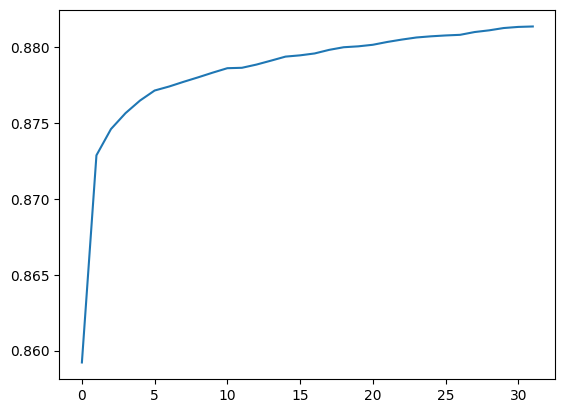

In [233]:
import matplotlib.pyplot as plt 
plt.plot(mean_list)

In [234]:
ga_cost_hist = []
for run in range(100):
  score_best_individual, parameters_best_individual, res = run_f1_ga(ITERATIONS = 32, POPULATION = 32)

  trlist = np.array([])
  for i in range(len(res.history)):
    trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 
    
  scorelist = []

  for i in range(len(trlist)):
  #for i in range(1):
    if i == 0:
      scorelist.append(trlist[i])
    elif trlist[i] > scorelist[i-1]:
      scorelist.append(trlist[i])
    else:
      scorelist.append(scorelist[i-1])
    
  ga_cost_hist.append(scorelist)

C:\Users\Felps\AppData\Local\Temp\ipykernel_8744\1421991478.py:5: DeprecationWarning: Call to deprecated function (or staticmethod) get_termination. (Please use `from pymoo.termination import get_termination`)
  term = get_termination("n_gen", ITERATIONS)
  0%|          | 0/32 [02:38<?, ?it/s]


In [235]:
ga_mean_list = []
for i in range(32):
    sum_values = 0
    for j in range(100):
        sum_values += -ga_cost_hist[j][i]
    ga_mean_list.append(sum_values/100)

In [241]:
newlist = [-i for i in ga_mean_list]
newlist

[0.8491262572350705,
 0.8722502802605159,
 0.8736990903799096,
 0.8757233461559529,
 0.8768083254279709,
 0.8777780368570757,
 0.8785217719190352,
 0.8791148964605969,
 0.8796408535240329,
 0.8799530317442317,
 0.8802628178579055,
 0.8806464226254921,
 0.8809643874742143,
 0.8815296548359101,
 0.8815935773481055,
 0.8817484710026575,
 0.8819065456933042,
 0.8819929515330593,
 0.8822036223136956,
 0.8825896673826986,
 0.8826769677953594,
 0.8827796555339681,
 0.8829908917930674,
 0.8829990303908741,
 0.8830638311751585,
 0.88340917550198,
 0.883529388772862,
 0.8837235666077322,
 0.8838430048526792,
 0.884051474709576,
 0.8842412209525824,
 0.8843628455191092]

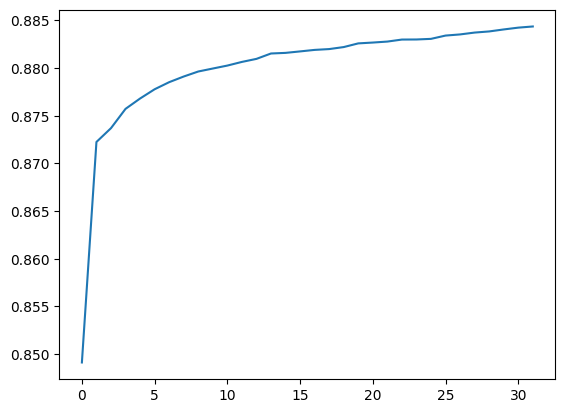

In [242]:

plt.plot(newlist)

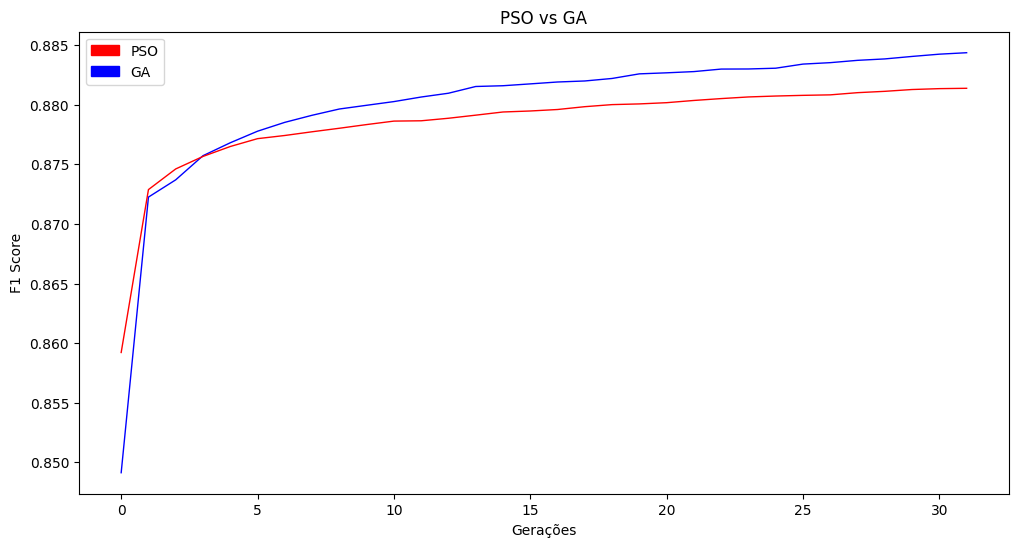

In [254]:
from IPython.core.pylabtools import figsize
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
red_patch = mpatches.Patch(color='red', label='PSO')
blue_patch = mpatches.Patch(color='blue', label='GA')

plt.legend(handles=[red_patch, blue_patch])
plt.plot(newlist, color='blue', linewidth=1, linestyle='-')
plt.plot(mean_list, color='red', linewidth=1, linestyle='-')

# Add the title to the plot
plt.title('PSO vs GA')
# Add x-label and y-label
plt.ylabel('F1 Score')
plt.xlabel('Gerações')
plt.savefig('pso_vs_ga_plot_1.pdf')

plt.show()
